<a href="https://colab.research.google.com/github/siwarnasri/Zindi_competition_notbooks/blob/main/SA_Collection_DeepMind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


## <font color="blue"> Table of Contents

* [1 Introduction to the Notebook](#1)
* [2 Connecting Datasets](#2)
  * [2.1 Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A](#2.1)
  * [2.2 Sentinel-1 SAR GRD: C-band Synthetic Aperture Radar Ground Range](#2.2)
  * [2.3 CAELUM South Africa Flood EventsDetected, log scaling](#2.3)
* [3. CAELUM South Africa Flood Events](#3)
  * [3.1 True Caelum Flood Events](#3.1)
  * [3.2 Common Caelum Flood Events](#3.2)
  * [3.3 CAELUM South Africa Flood Events](#3.3)
* [4. Generate a DataFrame containing the overlap of Sentinel-1 SAR GRD and Sentinel-2 harmonized MSI passage dates](#4)
* [5. Downloading Images](#5)
  * [5.1 Create empty folders](#5.1)
  * [5.2 Export a Single Image functions](#5.2)
  * [5.3 Mask functions](#5.3)
  * [5.4 Create new band combinations from Sentinel-2's harmonized MSI bands](#5.4)
  * [5.5 Download Images](#5.5)
  * [5.6 Output Images Visualization](#5.6)

<a id="1"></a>
# <font color="blue"> 1. Introduction to the Notebook

<font size="3">  

Google earth engine is a platform for Geospatial data analysis from Google. It has data from many different satellites including the Sentinel from European Space Agency. Several tutorials for learning the syntax and code snippets have been created on the Google developer website, which can be used by Earth Engine users : [https://developers.google.com/earth-engine/tutorials/community/explore](https://developers.google.com/earth-engine/tutorials/community/explore)

Here, I'm trying to use the Google Earth engine to retrieve sentinel-1 and sentinel-2 data relating to the CAELLUM spreadsheet of flooding events in the South African region.

<a id="2"></a>
# <font color="blue"> 2. Connecting Datasets

<a id="2.1"></a>
<p font size="3">

#### <font color="lightblue">2.1 Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A</font>


Sentinel-2 is equipped with the Multispectral Imager (MSI). This sensor offers 13 spectral bands with a pixel size of 10 to 60 meters.

The channels for blue (B2), green (B3), red (B4) and near infrared (B8) have a resolution of 10 meters. The channels for the red edge (B5), the near infrared NIR (B6, B7 and B8A) and the short-wave infrared SWIR (B11 and B12) have a ground sampling distance of 20 meters. And the coastal aerosol (B1) and the cirrus band (B10) have a pixel size of 60 meters.

Further details on the Harmonized Sentinel-2 MSI dataset can be found under this link: [https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED)

On this notebook we will export the different Harmonized Sentinel-2 MSI bands as concatenated or separated images, as well as the following combinations:

* <font color="lightgreen"> True color image (RGB) :

A true color image is a combination of the red, green and blue bands. The result is an image that looks the way our eyes perceive the world and its colors. For this reason, true color is the preferred image output for visual inspections.

* <font color="lightgreen"> Near Infrared (NIR) :

As the name suggests, this satellite image output only captures wavelengths in the near infrared, which lie just outside the visible spectrum at the red end. Near infrared is not visible to the human eye, but a satellite equipped with NIR sensors can detect it. Near-infrared reflectance is usually shown as red on images. The actual red area is shown as green, the green area is shown as blue, and the blue area is omitted. Near-infrared is often used to examine vegetation type, density, water content and plant health.

* <font color="lightgreen"> Normalized Difference Vegetation Index (NDVI) :

NDVI is widely used in agriculture and forestry. It can be used to measure how strongly the plant reflects near-infrared light. Dry, diseased and unhealthy vegetation tends to absorb more near-infrared light than it reflects, so NDVI images can show this.

Further combinations of the Sentinel-2 bands can be found at the following link : [https://gisgeography.com/sentinel-2-bands-combinations/](https://gisgeography.com/sentinel-2-bands-combinations/)

</p>

<a id="2.2"></a>
<p font size="3">

#### <font color="lightblue"> 2.2 Sentinel-1 SAR GRD: C-band Synthetic Aperture Radar Ground Range Detected, log scaling

While multispectral satellite images can capture data in the visible, near and short-wave infrared range of the electromagnetic spectrum, SAR uses longer wavelengths. The main advantage is that you can see through clouds and the images can be taken day and night.

SAR images are colored by the wave polarizations. Polarization refers to the direction of propagation of an electromagnetic wave, i.e. the signal transmitted by the satellite.

VV and VH backscatter polarization refers to the polarization of the radar waves transmitted and received by a satellite sensor. In VV polarization, the electric field of the radar wave is oriented vertically (along the vertical axis), while in VH polarization, the electric field is oriented horizontally (along the horizontal axis).

A time series of backscattering provides important information about the development of surface features over time. For example, changes in backscatter coefficients can indicate changes in surface roughness, vegetation, soil moisture and other geophysical properties. These changes can provide valuable information for landform classification, flood mapping and change detection.
</p>

<a id="2.3"></a>
<font size="3">

### <font color="lightblue"> 2.3 CAELUM South Africa Flood Events

<font size="3">

### <font color="lightgreen"> 2.3.1 import libraries

In [ ]:
import numpy as np
import pandas as pd

import math
import datetime

import ee

import tifffile as tiff
import IPython.display as disp

from IPython.display import FileLink
import requests
import shutil
import geemap

from sklearn.preprocessing import LabelEncoder
from joblib import Parallel, delayed

import os
import gc
import time

# import matplotlib.pyplot as plt
# import seaborn as sns

# from collections import Counter

<font size="3">

### <font color="lightgreen"> 2.3.2 Google Earth Initialization

<font size="3">
    We need to use Earth Engine Authenticate and Initialize functions before using its other functionality.
More on these functions : [https://developers.google.com/earth-engine/apidocs/ee-authenticate](https://developers.google.com/earth-engine/apidocs/ee-authenticate)

In [ ]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=T5qWzOk3W4ZPHaix9AQAiquOvyIghSTNAhH0WzqryvY&tc=I1to4gllILc7O78c-bfEaxbA8X4qytNn--Z-gP_Dp-s&cc=PFJhOKQ9fAl0oe__QT4nWDJyDWuXKKB0uymuEBFomps

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXmnLHriII6xAjFkpl2u8EmKP1wZkgxS-ojDza_LZAaaoHxnWGYYDAY

Successfully saved authorization token.


<font size="3">

### <font color="lightgreen"> 2.3.3 Import CAELUM Dataset

In [ ]:
sa_data_dir = './'

Caelum_df = pd.read_csv(os.path.join(sa_data_dir, 'CAELUM_2022.csv'))
Caelum_df['End Date'] = Caelum_df['End Date'].fillna(Caelum_df['Start Date'])

display(Caelum_df.shape, Caelum_df.sample())

(1917, 14)

,Uniq_ID,Year,Start Month,Start Day,End Month,End Day,Start Date,End Date,Event,Place,Latitude,Longitude,Height__m_,Comments
1096,1097,2004,12.0,16.0,NaN,NaN,2004/12/16,2004/12/16,FLOODS,ROODEPOORT,-25.73,29.82,1737.0,NaN


In [ ]:
essential_columns = ['Latitude', 'Longitude', 'Uniq_ID', 'Start Date', 'End Date',
       'Folder Name']

<a id="3"></a>
# <font color="blue"> 3. Generate new datasets from the original CAELUM dataset

<p font size="3">
    While Sentinel-1's SAR GRD was launched in 2014, Sentinel-2's harmonized MSI was launched on 28.03.2017. For this reason, I created a first table "CaelumTrueEvents_df" based on the Caelum dataset, which contains real floods that occurred after 28.03.2017.
    
Then, from the same Caelum dataset, I created a groupby(['Latitude', 'Longitude']) to count the number of floods that occurred in a specific area, regardless of the date of the events, and merged the frequent counts with the Caelum table to create the "CaelumMostCommon_df" table.
    
The final "ExtraGeoPoints_df" table was created from 12 geopoints from the WordView flood dataset where numerous floods have occurred over the last two years.
</p>

<a id="3.1"></a>
### <font color="lightblue"> 3.1 True Caelum Flood Events

In [ ]:
# DataFrame of true events list (events started after 28.03.2017, the start date of S2_SR_HARMONIZED satellite)
CaelumTrueEvents_df = Caelum_df[pd.to_datetime(Caelum_df['Start Date'])>=pd.to_datetime('2017-03-28')].copy()

CaelumTrueEvents_df['Folder Name'] = "417 GeoPoints since 2017"

CaelumTrueEvents_df = CaelumTrueEvents_df[essential_columns].drop_duplicates()

CaelumTrueEvents_df.reset_index(drop=True, inplace=True)
display(Caelum_df.shape, CaelumTrueEvents_df.shape, CaelumTrueEvents_df.tail(3))

(1917, 14)

(417, 6)

,Latitude,Longitude,Uniq_ID,Start Date,End Date,Folder Name
414,-31.218485,29.621356,1915,2023/03/23,2023/03/27,417 GeoPoints since 2017
415,-31.748514,28.744481,1916,2023/03/23,2023/03/27,417 GeoPoints since 2017
416,-31.633409,29.528064,1917,2023/03/23,2023/03/27,417 GeoPoints since 2017


<a id="3.2"></a>
### <font color="lightblue"> 3.2 Common Caelum Flood Events

<p font size="3">
    For the last two tables, we'll only export images from the last two years, to identify potential inandations. For this reason, I've set the "Start Date" to 2022-02-01 and the "End Date" to 2024-01-01.
</p>

In [ ]:
# DataFrame of most common flooding areas extracted from the true events
CaelumMostCommon_df = Caelum_df[['Uniq_ID', 'Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).count()

CaelumMostCommon_df = CaelumMostCommon_df[CaelumMostCommon_df.Uniq_ID>5]
CaelumMostCommon_df = Caelum_df.merge(CaelumMostCommon_df.reset_index(drop=False).drop('Uniq_ID', axis=1))

CaelumMostCommon_df['Uniq_ID'] = np.nan
CaelumMostCommon_df['Start Date'] = pd.to_datetime('2022-02-01')
CaelumMostCommon_df['End Date'] = pd.to_datetime('2024-01-01')

CaelumMostCommon_df['Folder Name'] = "49 most common GeoPoints [2022-2023]"

CaelumMostCommon_df = CaelumMostCommon_df[essential_columns].drop_duplicates()

CaelumMostCommon_df.reset_index(drop=True, inplace=True)
display(Caelum_df.shape, CaelumMostCommon_df.shape, CaelumMostCommon_df.tail(3))

(1917, 14)

(49, 6)

,Latitude,Longitude,Uniq_ID,Start Date,End Date,Folder Name
46,-25.57,30.53,NaN,2022-02-01,2024-01-01,49 most common GeoPoints [2022-2023]
47,-25.86,28.18,NaN,2022-02-01,2024-01-01,49 most common GeoPoints [2022-2023]
48,-26.16,28.08,NaN,2022-02-01,2024-01-01,49 most common GeoPoints [2022-2023]


<a id="3.3"></a>
### <font color="lightblue"> 3.3 WordView Flood Events

In [ ]:
# DataFrame of extra areas extracted from WordView flooding dataset
ExtraGeoPoints_df = pd.DataFrame([])

lat_lon = [-27.7268, 26.0598,
            -29.5471, 25.2629,
            -29.4583, 28.0989,
            -30.3723, 29.1008,
            -32.3149, 24.6117,
            -30.3110, 19.8129,
            -34.0175, 19.1567,
            -33.7285, 19.4270,
            -34.7085, 19.9279,
            -34.4712, 20.3718,
            -34.2746, 18.9633,
            -33.1583, 19.1611]

ExtraGeoPoints_df['Latitude'] = lat_lon[0:len(lat_lon):2]
ExtraGeoPoints_df['Longitude'] = lat_lon[1:len(lat_lon):2]

ExtraGeoPoints_df['Uniq_ID'] = np.nan
ExtraGeoPoints_df['Start Date'] = pd.to_datetime('2022-02-01')
ExtraGeoPoints_df['End Date'] = pd.to_datetime('2024-01-01')

ExtraGeoPoints_df['Folder Name'] = "12 extra GeoPoints [2022-2023]"
display(Caelum_df.shape, ExtraGeoPoints_df.shape, ExtraGeoPoints_df.sample(3))

(1917, 14)

(12, 6)

,Latitude,Longitude,Uniq_ID,Start Date,End Date,Folder Name
3,-30.3723,29.1008,NaN,2022-02-01,2024-01-01,12 extra GeoPoints [2022-2023]
8,-34.7085,19.9279,NaN,2022-02-01,2024-01-01,12 extra GeoPoints [2022-2023]
9,-34.4712,20.3718,NaN,2022-02-01,2024-01-01,12 extra GeoPoints [2022-2023]


<a id="4"></a>
# <font color="blue"> 4. Generate a DataFrame containing the overlap of Sentinel-1 SAR GRD and Sentinel-2 harmonized MSI passage dates

<p font size="3">
    The aim of the following section is to create the "intersection_dates_df" function that generates a DataFrame containing data on the overlap of Sentinel-1's SAR GRD and Sentinel-2's harmonized MSI passes over South Africa flood zones. The function requires the following parameters :
    
*    "df", is the dataset containing the "Start Date" and "End Date" of each flood event in a given "latitude" and "longitude".
    
*    "cloud_percentage" is the pre-filter value applied to Sentinel-2 bands to obtain less cloudy granules. whenever this value appoach 100, the images will be more cloud-free, but the number of images will be lowered.
    
*    "prev_next_days", firstly, the number of flood events in the CAELUM dataset is limited, secondly, the events displayed only describe certain geographical points and not the total area and, thirdly, in the original dataset, not all events had an exact "start date" and "end date". For these reasons, I added this parameter, which specifies the number of days to take on before the start and after the end of an event. Thus, the new "Start Date" is equal to "Start Date" + "prev_next_days" and the "End Date" is equal to "End Date" + "prev_next_days".
</p>

In [ ]:
# Overlap of Sentinel-1's SAR GRD and Sentinel-2's harmonized MSI passe dates
def intersection_dates(lst_dates_1, lst_dates_2):
    return list(set(lst_dates_1) & set(lst_dates_2))

# Convert the dates from Unix time to human-readable format
def human_readable_dates(dates):
    readable_dates = [datetime.datetime.fromtimestamp(int(dat) / 1000).strftime("%Y-%m-%d") for dat in dates]
    readable_dates = list(reversed(readable_dates))
    return readable_dates

In [ ]:
def intersection_dates_df(df, free_clouds=2, prev_next_days=30):
    ee.Initialize()

    cloud_percentage = free_clouds # Pre-filter to get less cloudy granules.
    nb_days_before_event = prev_next_days # days to take on before the start of a flood event
    nb_days_after_event = prev_next_days # days to take on next the end of a flood event

    S2_SR_inner_SAR_dataset = pd.DataFrame([])
    event_uniq_id = 0

    for geo_point_idx in df.T:
        folder_name = df.iloc[geo_point_idx]['Folder Name']
        caelum_uniq_id = df.iloc[geo_point_idx]['Uniq_ID']
        caelum_start_date = df.iloc[geo_point_idx]['Start Date']
        caelum_end_date = df.iloc[geo_point_idx]['End Date']
        geo_point_lat = df.iloc[geo_point_idx]['Latitude']
        geo_point_lon = df.iloc[geo_point_idx]['Longitude']

        start_a_month_before_event = pd.to_datetime(df.iloc[geo_point_idx]['Start Date']) - pd.to_timedelta(np.ceil(nb_days_before_event), unit="D")
        end_a_month_after_event = pd.to_datetime(df.iloc[geo_point_idx]['End Date']) + pd.to_timedelta(np.ceil(nb_days_after_event), unit="D")

        # Define the location of interest.
        u_poi = ee.Geometry.Point(geo_point_lon, geo_point_lat)

        # Define a region of interest with a buffer zone of 10000 km around the point.
        roi_filter = u_poi.buffer(1e4).bounds()

        date_filter = ee.Filter.date(start_a_month_before_event, end_a_month_after_event)

        # Define the Sentinel-2 HARMONIZED images source
        S2_SR_img_collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
                    .filterBounds(roi_filter)\
                    .filter(date_filter)\
                    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', cloud_percentage))\
                    .sort('system:time_start', False)

        # Print the number of images in the first filtered collection.
        # print('Number of S2_SR images:', S2_SR_img_collection.size().getInfo())

        # Get the dates of the images in the filtered collection
        dates = S2_SR_img_collection.aggregate_array("system:time_start").getInfo()

        # Convert the dates from Unix time to human-readable format
        S2_SR_readable_dates = human_readable_dates(dates)

        # Define the Sentinel-1 SAR GRD images source
        SAR_img_collection = ee.ImageCollection('COPERNICUS/S1_GRD')\
                    .filterBounds(roi_filter)\
                    .filter(date_filter)\
                    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
                    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))\
                    .filter(ee.Filter.eq('instrumentMode', 'IW'))\
                    .sort('system:time_start', False)

        # Print the number of images in the second filtered collection.
        # print('Number of SAR images:', SAR_img_collection.size().getInfo())

        # Get the dates of the images in the filtered collection
        dates = SAR_img_collection.aggregate_array("system:time_start").getInfo()

        # Convert the dates from Unix time to human-readable format
        SAR_readable_dates = human_readable_dates(dates)


        # Calculate the number of images in the 2 filtered collection.
        S2_SR_inner_SAR_dates = intersection_dates(S2_SR_readable_dates, SAR_readable_dates)
        # print(f"Number of intersected dates: {len(S2_SR_inner_SAR_dates)} \n")

        if len(S2_SR_inner_SAR_dates) > 0:
            S2_SR_inner_SAR_subset = pd.DataFrame([])

            S2_SR_inner_SAR_subset.loc[:,"satellites dates"] = S2_SR_inner_SAR_dates

            S2_SR_inner_SAR_subset.loc[:,"CAELUM Uniq_ID"] = caelum_uniq_id
            S2_SR_inner_SAR_subset.loc[:,"CAELUM Start Date"] = caelum_start_date
            S2_SR_inner_SAR_subset.loc[:,"CAELUM End Date"] = caelum_end_date

            S2_SR_inner_SAR_subset.loc[:,"Start Date"] = start_a_month_before_event
            S2_SR_inner_SAR_subset.loc[:,"End Date"] = end_a_month_after_event

            S2_SR_inner_SAR_subset.loc[:,"Longitude"] = geo_point_lon
            S2_SR_inner_SAR_subset.loc[:,"Latitude"] = geo_point_lat

            S2_SR_inner_SAR_subset.loc[:,"Folder Name"] = folder_name
            S2_SR_inner_SAR_subset.loc[:,"Event Uniq_ID"] = event_uniq_id

            event_uniq_id += 1
            S2_SR_inner_SAR_dataset = pd.concat([S2_SR_inner_SAR_dataset, S2_SR_inner_SAR_subset])

    S2_SR_inner_SAR_dataset['Image Id'] = np.arange(len(S2_SR_inner_SAR_dataset)).astype(str)

    return S2_SR_inner_SAR_dataset

In [ ]:
%%time

# DataFrame of true events list (events started after 2017, the start date of S2_SR_HARMONIZED satellite)
CaelumTrueEvents_inner_Dataset = intersection_dates_df(CaelumTrueEvents_df, free_clouds=2, prev_next_days=30)

# DataFrame of most common flooding areas extracted from the true events
CaelumMostCommon_inner_Dataset = intersection_dates_df(CaelumMostCommon_df, free_clouds=2, prev_next_days=30)

# DataFrame of extra areas extracted from WordView flooding dataset
ExtraGeoPoints_inner_Dataset = intersection_dates_df(ExtraGeoPoints_df, free_clouds=2, prev_next_days=30)

# Concatenate the three DataFrames
IntersectionDatesDataset = pd.concat([CaelumTrueEvents_inner_Dataset, CaelumMostCommon_inner_Dataset, ExtraGeoPoints_inner_Dataset])
IntersectionDatesDataset = IntersectionDatesDataset.reset_index(drop=True)

CPU times: user 7.89 s, sys: 291 ms, total: 8.18 s
Wall time: 2min 8s


In [ ]:
# Convert folder names to integers, then concatenate them with event and image indices.
le = LabelEncoder()
folder_names = le.fit_transform(IntersectionDatesDataset['Folder Name'])

IntersectionDatesDataset['Event Uniq_ID'] = IntersectionDatesDataset['Event Uniq_ID'].astype(str) +'_'+ folder_names.astype(str)
IntersectionDatesDataset['Image Id'] = IntersectionDatesDataset['Image Id'].astype(str) +'_'+ folder_names.astype(str)

<a id="5"></a>
# <font color="blue"> 5. Downloading Images

<p font size="3">
    The goal of this section is to export the images contained in the collected "IntersectionDatesDataset".

We will use the Parallel class from the joblib package to compute the application of the "download_tiles" function in parallel (multiprocessing). This function takes the following parameters:

* "df_row" represents each row of the "IntersectionDatesDataset" that contains the overlap of the passes of Sentinel-1's SAR GRD and Sentinel-2's harmonized MSI over the coordinates of an inundation point ('Latitude', 'Longitude') on an inundation date.

* "tile_formats" is a list of the desired formats in which the images are to be exported. It can be a list with one or more elements from ["tif", "png", "jpg"], each for GeoTiff, Png and Jpeg formats.

* "file_per_band" specifies how the GeoTiff images are to be exported. If it is set to True, each band is exported in a separate image, if it is set to False, all bands on the same image are exported as GeoTiff or/and as a new combination from the "bands_combinat" list.

* "bands_combinat" can be a list with one or more elements from ["vv", "rgb", "nir", "ndvi"], which means:

   * "vv" to export only the VV band from Sentinel-1
   * "nir" to export only the B8 band from Sentinel-2
   * "ndvi" to create a new NDVI band from the Sentinel-2 bands B4 and B8
   * "rgb" to create an RGB image from the Sentinel-2 bands B4, B3 and B2
   * "sentinel-1" to export each band of Sentinel-1 SAR in a separate GeoTiff format file
   * "sentinel-2" to export each band of Sentinel-2 Harmonized in a separate GeoTiff format file
</p>

<a id="5.1"></a>
<font size="3">

### <font color="lightblue"> 5.1 Create empty folders

In [ ]:
# Create empty folders for separate placement of images from each of the three concatenated DataFrames
# (CaelumTrueEvents_inner_Dataset, CaelumMostCommon_inner_Dataset, ExtraGeoPoints_inner_Dataset).
for folder in IntersectionDatesDataset['Folder Name'].unique():
    %mkdir '{sa_data_dir}{folder}'
    %mkdir '{sa_data_dir}{folder}/VV'
    %mkdir '{sa_data_dir}{folder}/S2_SR_HARMONIZED'

<a id="5.2"></a>
<font size="3">

### <font color="lightblue"> 5.2 Export a Single Image functions

In [ ]:
# Create function for downloading GeoTiff images in workspace
def save_tiff_localy(image, filename, region, file_per_band, scale):
    # Export an image localy
    geemap.ee_export_image(image,
                        filename=filename,
                        region=region,
                        # False : Exporting all bands as a single image
                        # True: Exporting each band as one image
                        file_per_band=file_per_band,
                        scale=scale # The scale to do stratified sampling
                           )
# Create function for downloading GeoTiff images to the Drive space
def save_tiff_to_drive(image, description, region, file_per_band, scale):
     # Export an image
    geemap.ee_export_image_to_drive(image,
                    description=description,
                    folder='SA Collection',
                    region=region,
                    # False : Exporting all bands as a single image
                    # True: Exporting each band as one image
                    file_per_band=file_per_band,
                    scale=scale
                                    )

# Create function for downloading images with Png and Jpeg formats in workspace
def save_image_localy(image, param_Vis, width, image_path):
            # image.getThumbURL() method is used to select the pixels
            image_url = image.getThumbUrl(param_Vis)
            #display(disp.Image(url=image_url, width=width))
            # Handle downloading the actual pixels.
            response = requests.get(image_url, stream=True)
            if response.status_code != 200:
                response.raise_for_status()
            with open(image_path, 'wb') as out_file:
                        shutil.copyfileobj(response.raw, out_file)
            del response

"""
# Download images by the fishnet cells in parallel.
fishnet = geemap.fishnet(roi_filter, h_interval=4.0, v_interval=4.0, delta=0.5)

geemap.download_ee_image_tiles_parallel(
    sar_tile, fishnet, out_dir=sa_data_dir, scale=35)
"""

'           \n# Download images by the fishnet cells in parallel.\nfishnet = geemap.fishnet(roi_filter, h_interval=4.0, v_interval=4.0, delta=0.5)\n\ngeemap.download_ee_image_tiles_parallel(\n    sar_tile, fishnet, out_dir=sa_data_dir, scale=35)\n'

<a id="5.3"></a>
<font size="3">

### <font color="lightblue"> 5.3 Mask functions
    
"maskS2clouds" is a function to limit clouds on Sentinel-2 bands and "mask_edge" is a mask function to limit the lower edges on Sentinel-1 bands

In [ ]:
# Function to mask clouds using the Sentinel-2 QA band
#  param {ee.Image} image Sentinel-2 image
#  return {ee.Image} cloud masked Sentinel-2 image
def maskS2clouds(image) :
    qa = image.select('QA60')

    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0)\
             .add(qa.bitwiseAnd(cirrusBitMask).eq(0))

    return image.updateMask(mask).divide(1e3)

# Function to mask lower edges using the Sentinel-1 VV band
def mask_edge(image):
    edge = image.lt(-30.0)
    masked_image = image.mask().And(edge.Not())

    return image.updateMask(masked_image)

<a id="5.4"></a>
<font size="3">

### <font color="lightblue"> 5.4 Create new band combinations from Sentinel-2's harmonized MSI bands

In [ ]:
def download_tiles(df_row, tile_formats=["png", "tif"], bands_combinat=["vv", "rgb", "nir", "ndvi"], file_per_band=True):
    # Initialize GEE to use the high-volume endpoint
    ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

    df_row['Image Format'] = tile_formats

    if file_per_band == True:
        bands_combinat = ["sentinel-1", "sentinel-2"]

    df_row['Band Combinations'] = bands_combinat

    for combination in bands_combinat:
        for tile_format in tile_formats:
            # Extract information about the event in question
            folder_name = df_row['Folder Name'] # one of the 3 main Folders (true events list, list of most common flooding areas extracted from the true events, and a list of extra areas extracted from WordView flooding dataset)
            tile_id = df_row['Image Id']
            event_uniq_id = df_row['Event Uniq_ID']
            event_date = df_row['satellites dates']
            event_lat = df_row['Latitude']
            event_lon = df_row['Longitude']

            # Set date filter to 24H (1 Day)
            event_date = pd.to_datetime(event_date)
            one_day_duration = event_date + pd.to_timedelta(np.ceil(1), unit="D")
            date_filter = ee.Filter.date(event_date, one_day_duration)

            # Define the location of interest.
            u_poi = ee.Geometry.Point(event_lon, event_lat)

            # Define a region of interest with a buffer zone of 10000 km around the point.
            roi_filter = u_poi.buffer(1e4).bounds()

            #
            if combination in ["vv", "sentinel-1"]:
                # Define the Sentinel-1 SAR GRD images source
                SAR_img_collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
                              .filterBounds(roi_filter) \
                              .filter(date_filter)\
                              .filter(ee.Filter.eq('instrumentMode', 'IW'))\
                              .map(mask_edge)

                if combination == "vv":
                    # Identifying the vertical-vertical (VV) band
                    SAR_tile = SAR_img_collection.first().select(['VV'])


                else: # elif combination == "sentinel-1"
                    # Identifying bands of satellite images
                    SAR_tile = SAR_img_collection.first()



                # Clip the image by region of interrest in South Africa.
                SAR_tile = SAR_tile.clip(roi_filter)


            else:
                # Define the Sentinel-2 HARMONIZED images source
                S2_SR_img_collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
                                .filterBounds(roi_filter)\
                                .filter(date_filter)\
                                .sort('system:time_start', False)\
                                .map(maskS2clouds)

                if combination == "rgb":
                    # Identifying bands of satellite images
                    S2_SR_tile = S2_SR_img_collection.mean().select(['B4', 'B3', 'B2'])


                elif combination == "ndvi":
                    # Identifying bands of satellite images
                    S2_SR_tile = S2_SR_img_collection.median()
                    # Generation of the Normalized Difference Vegetation Index (NDVI) Band using only B8 and B4 bands of high-resolution satellite imagery
                    # Where NDVI = (NIR - RED) / (NIR + RED), where RED is B4 and  NIR is B8
                    ndvi = S2_SR_tile.normalizedDifference(['B8', 'B4']).rename('NDVI')
                    S2_SR_tile = S2_SR_tile.addBands(ndvi)
                    S2_SR_tile = S2_SR_tile.select('NDVI')

                elif combination == "nir":
                    # Identifying the near-infrared (NIR|B8) band
                    S2_SR_tile = S2_SR_img_collection.mean().select(['B8'])

                elif combination == "sentinel-2":
                    # Identifying bands of satellite images
                    S2_SR_tile = S2_SR_img_collection.mean()

                # Clip the image by region of interrest in South Africa.
                S2_SR_tile = S2_SR_tile.clip(roi_filter)

            # Download GeoTiff bands as a single image or separate images
            if tile_format == "tif":
                if combination in ["vv", "sentinel-1"]:
                    # Create the URL associated with the styled image data.
                    sar_path = os.path.normpath(f'{sa_data_dir}/{folder_name}/VV/{combination}_{event_uniq_id}_{tile_id}.{tile_format}')
                    # Save only the output directory without the image format. Default to the current working directly
                    df_row[f'{tile_format} SAR Path'] = sar_path[:-4]

                    # Export an image localy
                    save_tiff_localy(SAR_tile, sar_path, roi_filter, file_per_band, 35)
                    ## Export an image to Google Drive
                    # save_tiff_to_drive(SAR_tile, "S1_GRD", roi_filter, file_per_band, 35)

                else:
                    # Create the URL associated with the styled image data.
                    s2_sr_path = os.path.normpath(f'{sa_data_dir}/{folder_name}/S2_SR_HARMONIZED/{combination}_{event_uniq_id}_{tile_id}.{tile_format}')
                    # Save only the output directory without the image format. Default to the current working directly
                    df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]

                    # Export an image localy
                    save_tiff_localy(S2_SR_tile, s2_sr_path, roi_filter, file_per_band, 35)

                    ## Export an image to Google Drive
                    # save_tiff_to_drive(S2_SR_tile, "S2_SR_HARMONIZED", roi_filter, file_per_band, 35)

            # Download combination bands in Jpeg and/or Png formats
            elif (tile_format in ["png", "jpg"]) & (file_per_band == False) & (combination == "vv"):
                # Set visualization parameters
                # If you want the exported images to have coordinate system,
                # change format to GEO_TIFF. Otherwise, you can use png or jpg formats.
                sar_param_Vis = {
                                  'min': -25,
                                  'max': 5,
                                  'region': roi_filter, # Define the Region of Interest (ROI)
                                  'dimensions': 512, # The dimension of each image chip
                                  'format': tile_format, # # The output image format, can be png, jpg, ZIPPED_GEO_TIFF, GEO_TIFF, NPY
                                  'palette': ['black', 'white']
                                        }
                # Create the URL associated with the styled image data.
                sar_path = os.path.normpath(f'{sa_data_dir}/{folder_name}/VV/{combination}_{event_uniq_id}_{tile_id}.{tile_format}')

                # Save only the output directory without the image format. Default to the current working directly
                df_row[f'{tile_format} SAR Path'] = sar_path[:-4]

                save_image_localy(SAR_tile, sar_param_Vis, 512, sar_path)

            elif (tile_format in ["png", "jpg"]) & (file_per_band == False) & (combination in ["rgb", "nir", "ndvi"]):
                if combination == "ndvi":
                    # The next color combination is taken from the examples script: Image -> Normalized Difference:
                    # Please keep in mind that for this palette, you should set your minimum visible value to 0, as it s designed for this purpose.
                    # This is due to it being a gradient from brown to green tones, with a heavy focus on the green side. If we would set min: -1, NDVI = 0 would already be displayed in a dark green tone.
                    palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
                               '004C00', '023B01', '012E01', '011D01', '011301']

                    s2_sr_param_Vis = {
                                      'min': 0,
                                      'max': 1,
                                      'region': roi_filter, # Define the Region of Interest (ROI)
                                      'dimensions': 512, # The dimension of each image chip
                                      'format': tile_format, # # The output image format, can be png, jpg, ZIPPED_GEO_TIFF, GEO_TIFF, NPY
                                      'palette': palette
                                            }
                elif combination == "nir":
                    s2_sr_param_Vis = {
                                      'min': 0,
                                      'max': 3,
                                      'region': roi_filter, # Define the Region of Interest (ROI)
                                      'dimensions': 512, # The dimension of each image chip
                                      'format': tile_format, # # The output image format, can be png, jpg, ZIPPED_GEO_TIFF, GEO_TIFF, NPY
                                      'palette': ['black', 'white']
                                            }
                elif combination == "rgb":
                    s2_sr_param_Vis = {
                                      'min': 0,
                                      'max': 3,
                                      'gamma': 1.1,
                                      'region': roi_filter, # Define the Region of Interest (ROI)
                                      'dimensions': 512, # The dimension of each image chip
                                      'format': tile_format # # The output image format, can be png, jpg, ZIPPED_GEO_TIFF, GEO_TIFF, NPY
                                            }

                # Create the URL associated with the styled image data.
                s2_sr_path = os.path.normpath(f'{sa_data_dir}/{folder_name}/S2_SR_HARMONIZED/{combination}_{event_uniq_id}_{tile_id}.{tile_format}')

                # Save only the output directory without the image format. Default to the current working directly
                df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]

                save_image_localy(S2_SR_tile, s2_sr_param_Vis, 512, s2_sr_path)

    return df_row

<a id="5.5"></a>
<font size="3">

### <font color="lightblue"> 5.5 Download Images

In [ ]:
%%time

limited = True

if limited == True : # Download only the first 3 rows of images as GeoTiff and Png formats
    limit=3
    tile_formats=["png", "tif"] # Images as GeoTiff and Png formats
    bands_combinat=["sentinel-1", "sentinel-2", "vv", "rgb", "nir", "ndvi"] # Export all the combinations, as well as all the bands
    file_per_band=False # When exporting GeoTiff format, all bands will be in a single imagee, assigne it to True to get each band in a separate image

    # Downloading images in parallel
    TilesDataset = Parallel(n_jobs=-1, backend="threading", verbose=1)(
        delayed(download_tiles)(IntersectionDatesDataset.iloc[row_idx], tile_formats, bands_combinat, file_per_band) for row_idx in IntersectionDatesDataset.index[:limit])

else:
    limit=-1 # download all the images previously collected in the "IntersectionDatesDataset" dataframe
    tile_formats=["png"] # Images as Png formats
    bands_combinat=["vv", "rgb", "nir", "ndvi"] # Export only the VV band and the RGB, NIR and NDVI combinations
    file_per_band=False # When exporting GeoTiff format, all bands will be in a single image, assigne it to True to get each band in a separate image

    # Downloading images in parallel
    TilesDataset = Parallel(n_jobs=-1, verbose=1)(
        delayed(download_tiles)(IntersectionDatesDataset.iloc[row_idx], tile_formats, bands_combinat, file_per_band) for row_idx in IntersectionDatesDataset.index[:limit])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
<ipython-input-17-654c52b10ad1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Image Format'] = tile_formats
<ipython-input-17-654c52b10ad1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Image Format'] = tile_formats
<ipython-input-17-654c52b10ad1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Band Combinations'] = bands_co

Generating URL ...
Generating URL ...
Please wait ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/VV/sentinel-1_0_1_0_1.tif
Generating URL ...


<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/VV/sentinel-1_1_1_1_1.tif
Generating URL ...


<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/sentinel-2_0_1_0_1.tif


<ipython-input-17-654c52b10ad1>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]
<ipython-input-17-654c52b10ad1>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]


Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/sentinel-2_1_1_1_1.tif


<ipython-input-17-654c52b10ad1>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]
<ipython-input-17-654c52b10ad1>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]


Generating URL ...
Please wait ...
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/VV/vv_0_1_0_1.tif


<ipython-input-17-654c52b10ad1>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Data downloaded to /content/417 GeoPoints since 2017/VV/vv_1_1_1_1.tif


<ipython-input-17-654c52b10ad1>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Generating URL ...
Please wait ...
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/rgb_0_1_0_1.tif
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/rgb_1_1_1_1.tif
Generating URL ...
Please wait ...
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/nir_1_1_1_1.tif
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/nir_0_1_0_1.tif
Generating URL ...
Please wait ...
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi_1_1_1_1.tif
Generating URL ...


<ipython-input-17-654c52b10ad1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Image Format'] = tile_formats
<ipython-input-17-654c52b10ad1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Image Format'] = tile_formats
<ipython-input-17-654c52b10ad1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row['Band Combinations'] = bands_combinat
<ipython-input-17-654c52b10ad1>:10: SettingWithCopyWarning: 
A value is tr

Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi_0_1_0_1.tif
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/VV/sentinel-1_2_1_2_1.tif
Generating URL ...


<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/sentinel-2_2_1_2_1.tif


<ipython-input-17-654c52b10ad1>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]
<ipython-input-17-654c52b10ad1>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]
<ipython-input-17-654c52b10ad1>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} SAR Path'] = sar_path[:-4]


Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/VV/vv_2_1_2_1.tif


<ipython-input-17-654c52b10ad1>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]
<ipython-input-17-654c52b10ad1>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row[f'{tile_format} S2_SR Path'] = s2_sr_path[:-4]


Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/rgb_2_1_2_1.tif
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/nir_2_1_2_1.tif
Generating URL ...
Please wait ...
Data downloaded to /content/417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi_2_1_2_1.tif
CPU times: user 5.8 s, sys: 566 ms, total: 6.37 s
Wall time: 44.2 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished


In [ ]:
SouthAfricaDataCollection = pd.concat(TilesDataset, axis=1).T

SouthAfricaDataCollection.to_csv('SA Data Collection.csv', index=False)
SouthAfricaDataCollection.tail(2)

,satellites dates,CAELUM Uniq_ID,CAELUM Start Date,CAELUM End Date,Start Date,End Date,Longitude,Latitude,Folder Name,Event Uniq_ID,Image Id,Image Format,Band Combinations,tif SAR Path,tif S2_SR Path,png SAR Path,png S2_SR Path
1,2019-01-25,1519.0,2019/02/10,2019/02/10,2019-01-11,2019-03-12,26.16,-29.09,417 GeoPoints since 2017,1_1,1_1,"[png, tif]","[sentinel-1, sentinel-2, vv, rgb, nir, ndvi]",417 GeoPoints since 2017/VV/vv_1_1_1_1,417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi...,417 GeoPoints since 2017/VV/vv_1_1_1_1,417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi...
2,2019-02-08,1523.0,2019/03/10,2019/03/10,2019-02-08,2019-04-09,31.0,-29.7,417 GeoPoints since 2017,2_1,2_1,"[png, tif]","[sentinel-1, sentinel-2, vv, rgb, nir, ndvi]",417 GeoPoints since 2017/VV/vv_2_1_2_1,417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi...,417 GeoPoints since 2017/VV/vv_2_1_2_1,417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi...


<a id="5.6"></a>
<font size="3">

### <font color="lightblue"> 5.6 Output Images Visualization

In [ ]:
for i in os.walk(f'{sa_data_dir}/417 GeoPoints since 2017/S2_SR_HARMONIZED/'):
    print(i)

('.//417 GeoPoints since 2017/S2_SR_HARMONIZED/', [], ['ndvi_2_1_2_1.png', 'nir_1_1_1_1.tif', 'rgb_2_1_2_1.png', 'rgb_1_1_1_1.png', 'ndvi_0_1_0_1.png', 'rgb_0_1_0_1.png', 'sentinel-2_0_1_0_1.tif', 'nir_0_1_0_1.tif', 'ndvi_0_1_0_1.tif', 'ndvi_2_1_2_1.tif', 'sentinel-2_2_1_2_1.tif', 'ndvi_1_1_1_1.tif', 'nir_1_1_1_1.png', 'nir_2_1_2_1.tif', 'sentinel-2_1_1_1_1.tif', 'rgb_2_1_2_1.tif', 'nir_2_1_2_1.png', 'rgb_1_1_1_1.tif', 'nir_0_1_0_1.png', 'rgb_0_1_0_1.tif', 'ndvi_1_1_1_1.png'])


(573, 656, 3)

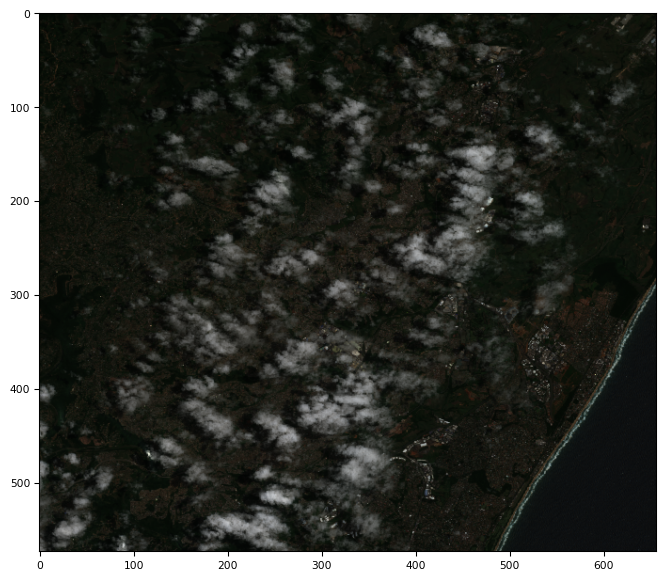

In [35]:
tif_path = f'{sa_data_dir}/417 GeoPoints since 2017/S2_SR_HARMONIZED/rgb_2_1_2_1.tif'
tfile = tiff.imread(tif_path)
display(tfile.shape)
tiff.imshow(tfile)
del tfile

(573, 656)

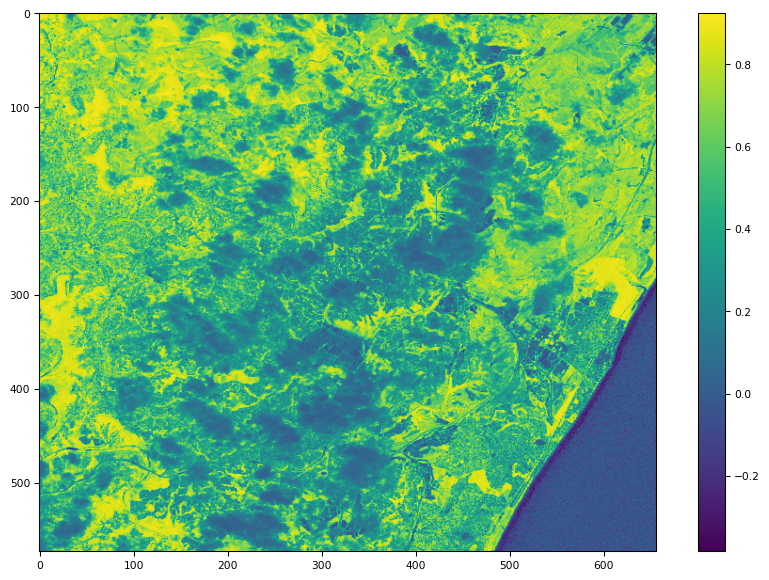

In [ ]:
tif_path = f'{sa_data_dir}/417 GeoPoints since 2017/S2_SR_HARMONIZED/ndvi_2_1_2_1.tif'
tfile = tiff.imread(tif_path)
display(tfile.shape)
tiff.imshow(tfile)
del tfile

(574, 684, 23)

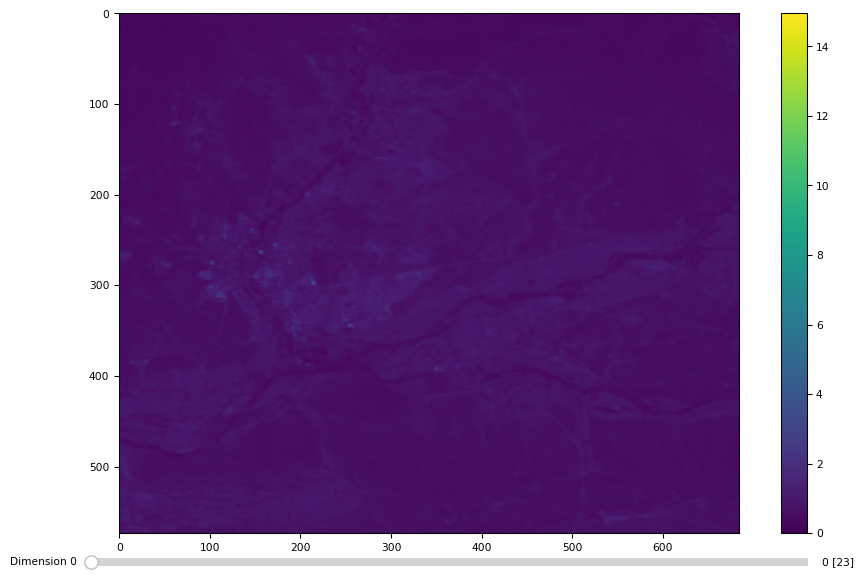

In [ ]:
tif_path = f'{sa_data_dir}/417 GeoPoints since 2017/S2_SR_HARMONIZED/sentinel-2_0_1_0_1.tif'
tfile = tiff.imread(tif_path)
display(tfile.shape)
tiff.imshow(tfile)
del tfile

(573, 656)

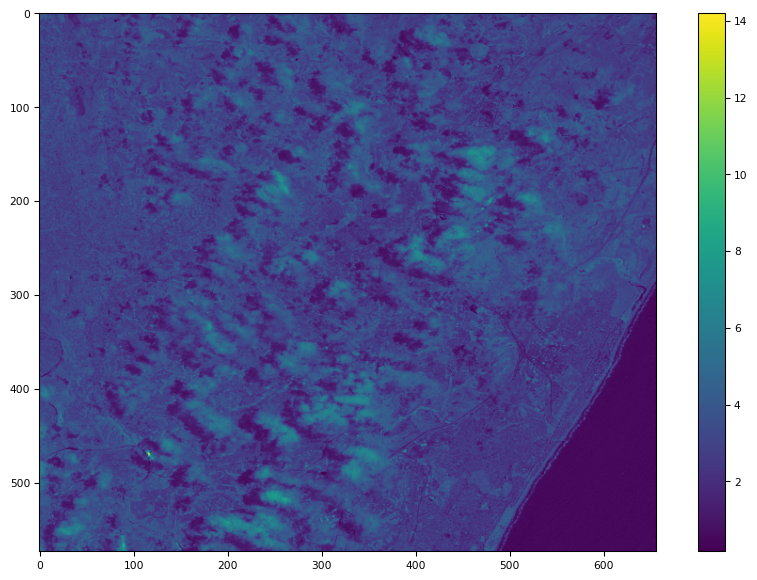

In [ ]:
tif_path = f'{sa_data_dir}/417 GeoPoints since 2017/S2_SR_HARMONIZED/nir_2_1_2_1.tif'
tfile = tiff.imread(tif_path)
display(tfile.shape)
tiff.imshow(tfile)
del tfile

In [ ]:
for i in os.walk(f'{sa_data_dir}417 GeoPoints since 2017/VV/'):
    print(i)
    break

('./417 GeoPoints since 2017/VV/', [], ['vv_1_1_1_1.png', 'vv_2_1_2_1.png', 'vv_0_1_0_1.tif', 'vv_1_1_1_1.tif', 'vv_0_1_0_1.png', 'sentinel-1_2_1_2_1.tif', 'sentinel-1_1_1_1_1.tif', 'sentinel-1_0_1_0_1.tif', 'vv_2_1_2_1.tif'])


(578, 577)

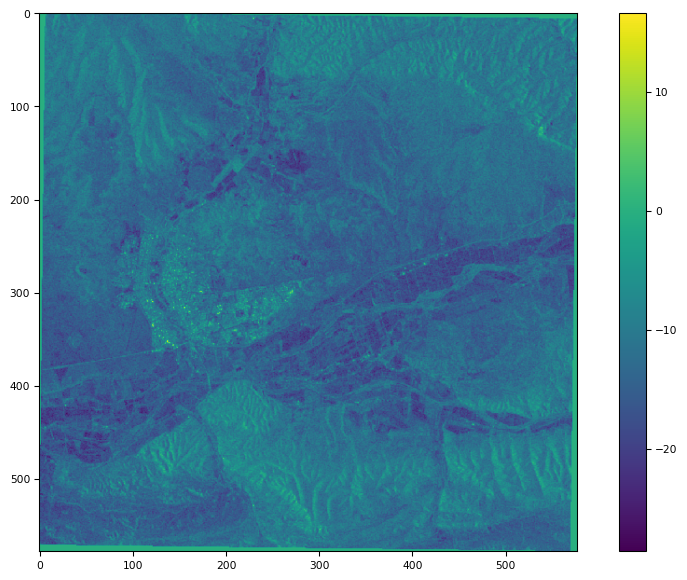

In [ ]:
tif_path = f'{sa_data_dir}/417 GeoPoints since 2017/VV/vv_0_1_0_1.tif'
tfile = tiff.imread(tif_path)
display(tfile.shape)
tiff.imshow(tfile)
del tfile